In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/T124OPPE2_ModelBuilding_V1.csv',header=0,index_col=None)

In [ ]:
df.columns.tolist()

['Gender',
 'Age',
 'HasTension',
 'AnyHeartDisease',
 'NeverMarried',
 'Occupation_Govt_job',
 'Occupation_Never_worked',
 'Occupation_Private',
 'Occupation_Self-employed',
 'Occupation_children',
 'LivesIn',
 'GlucoseLevel',
 'BMI',
 'SmokingStatus_formerly smoked',
 'SmokingStatus_never smoked',
 'SmokingStatus_smokes',
 'HeartAttack']

In [ ]:
y=df['HeartAttack']

In [ ]:
x=df.drop('HeartAttack',axis=1)

In [ ]:
0.3*4000

1200.0

In [ ]:
4000-1200

2800

In [ ]:
X.shape

(4000, 16)

In [ ]:
x_train = x.iloc[:2800]
x_test = x.iloc[2800:]
y_train = y.iloc[:2800]
y_test = y.iloc[2800:]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

# Instructions (Q2-Q3)
Instantiate a perceptron classifier that with following parameters:

	random_state = 1729
	learning rate = 1
	Train for appropriate number of iterations
	Do not shuffle the dataset for each iteration.
	Include the intercept (bias) term.
	Use 10% of the data for validation fraction.
	Do not apply regularization.
	Set warm start to true.
Hint: one iteration of training indicates going over each sample exactly once.

Train the classifier on the training data.

# Q2.  Train the perceptron classifier for 5 iterations. What is value of bias (intercept) after 5th iteration?

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,log_loss

In [ ]:
P=Perceptron(random_state=1729,
             eta0=1,
             max_iter=1,
             shuffle=False,
             fit_intercept=True,
             validation_fraction=0.1,
             penalty=None,
             warm_start=True)

In [ ]:
for i in range(5):
  P.fit(x_train,y_train)
  print(f"Iteration {i+1}, Intercept: {P.intercept_}")


Iteration 1, Intercept: [-4.]
Iteration 2, Intercept: [-3.]
Iteration 3, Intercept: [-3.]
Iteration 4, Intercept: [-4.]
Iteration 5, Intercept: [-3.]


In [ ]:
print("\nFinal intercept after 5 iterations:", P.intercept_)


Final intercept after 5 iterations: [-3.]



# Q3 . In continuation of the previous question, compute precision accurate upto 2 decimal places on training data for positive class (i.e. class value 1), after 5 iterations.

 [Hint: Use estimator trained from the previous question]

In [ ]:
y_pred_train=P.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2664
           1       0.67      0.01      0.03       136

    accuracy                           0.95      2800
   macro avg       0.81      0.51      0.50      2800
weighted avg       0.94      0.95      0.93      2800



In [ ]:
train_precission_1=precision_score(y_train,y_pred_train)
print('train_precission_score for class 1',train_precission_1)

train_precission_score for class 1 0.6666666666666666


# Q4.
Train (on training data only) logistic regression using SGDClassifier. Use the following parameters:

	Choose appropriate loss value to obtain logistic regression
	penalty='l2',
	eta0=0.001,
	alpha=0,
	learning_rate='constant'
	random_state=1729.
	warm_start = True

Train the classifier for 5 iterations and note the value of the loss in each iteration. What will be the loss value after second iteration? Answer upto three decimal places.

Note: Set the remaining parameters, if any, accordingly to be able to get the loss value after second iteration. Also note that the classifier has to be trained for 5 iterations.

In [ ]:
from logging import log
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

#initialize the model
SL=SGDClassifier(loss='log_loss',
                 penalty='l2',
                 eta0=0.001,
                 alpha=0,
                 max_iter=1,
                 learning_rate='constant',
                 random_state=1729,
                 warm_start=True)

# train the classifier for 5 iterations

loss_values=[]

for i in range(5):
  SL.partial_fit(x_train,y_train,classes=np.unique(y_train))
  y_prob=SL.predict_proba(x_train)
  loss=log_loss(y_train,y_prob)
  loss_values.append(loss)
  print(i+1,loss)

1 0.2529904609012919
2 0.20828682141739835
3 0.19406901833322654
4 0.18699850891012404
5 0.18255077295024025


# Q5 & Q6

Use GridSearchCV with SGDClassifier. Following are the classifier's parameters:

	loss = 'log_loss'
	learning_rate = 'constant'
	random_state = 1729

Following are parameters to examine:

	alpha = [0.0001, 0.0005, 0.001, 0.005]
	eta0 = [0.01, 0.05, 0.1, 0.5]


In [ ]:
S=SGDClassifier(loss='log_loss',
                learning_rate='constant',
                random_state=1729)
param_grid={'alpha':[0.0001, 0.0005, 0.001, 0.005],
            'eta0':[0.01, 0.05, 0.1, 0.5]}
grid=GridSearchCV(S,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_


{'alpha': 0.0001, 'eta0': 0.01}

# Q5 .
What are the best values of alpha and eta0 respectively?

In [ ]:
print(grid.best_params_)

{'alpha': 0.0001, 'eta0': 0.01}


In [ ]:
print('best alpha',grid.best_params_['alpha'])
print('best eta0',grid.best_params_['eta0'])

best alpha 0.0001
best eta0 0.01


#. Q6
Create a new estimator using SGDClassifier that uses the best parameters obtained in Gridsearch earlier ((learning rate to be constant, random_state to be '1729' and use appropriate loss for logistic regression)) and set the weight of class 0 to be 0.1 and the weight of class 1 to be 2. How many samples of class 1 from the test set are correctly predicted by this estimator?

In [ ]:
SGDB=SGDClassifier(alpha=grid.best_params_['alpha'],
                   eta0=grid.best_params_['eta0'],
                   learning_rate='constant',
                   random_state=1729,
                   loss='log_loss',
                   class_weight={0:0.1,1:2})

SGDB.fit(x_train,y_train)
y_pred_test=SGDB.predict(x_test)
print(confusion_matrix(y_test,y_pred_test))


[[843 299]
 [ 11  47]]


In [ ]:
#                            Predicted
#                           0       1
#          Actual  0     TN      FP
#                  1     FN      TP


# Q7.

5 points
Fit an SVM classifier with following parameters:

	kernel='rbf'
	decision_function_shape='ovr'
	random_state=1729
	C=1

In [ ]:
from sklearn.svm import SVC
SVM=SVC(kernel='rbf',
        decision_function_shape='ovr',
        random_state=1729,
        C=1)
SVM.fit(x_train,y_train)
y_pred_test=SVM.predict(x_test)
print(confusion_matrix(y_test,y_pred_test))

[[1142    0]
 [  58    0]]


# ALL other MODEL BUILDING
SVM

# 4. SVM Classifier




In [ ]:
# Initializing the  model
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
SV=SVC(kernel='rbf',
       C=1,
       gamma='scale',
       decision_function_shape='ovr',
       random_state=42)

# Fitting the model on train Data  [NOTE: Always Fit the Model on the Train Data only]
SV.fit(x_train,y_train)

# getting predictions ( they will ask specisfic predictions [ex: accurecy_score on train data? then  you have to use the y_pred-tarin])
y_pred_train=SV.predict(x_train)
y_pred_test=SV.predict(x_test)
y_pred_overall=SV.predict(x)

# Attribute to Extract
# print('Model_coefficients:\n',SV.coef_)
# print('n\n\n')
# print('bias term / intercept Term :',SV.intercept_[0])


#getting the metrics  ( you can Calucalte just [Classification_report  & Confusion Matrix] and Ans all metris questions )

# Classification_report
# [NOTE: with this YOu can get all metrics like {1.precision_score, 2.recall_score, 3.f1_score, 4.accuracy_score ] for asked Dataset in question

print('classification report for traing dataset :\n\n', classification_report(y_train,y_pred_train,digits=3))
print('n\n')
print('classification report for test dataset :\n\n', classification_report(y_test,y_pred_test,digits=3))
print('n\n')
print('classification report for OverAll dataset :\n\n', classification_report(y,y_pred_overall,digits=6))
print('n\n\n')


#Confusion Matrics

print('Confusion Matrix of training Dataset :\n',confusion_matrix(y_train,y_pred_train))
print('n\n')
print('Confusion Matrix of test Dataset :\n',confusion_matrix(y_test,y_pred_test))
print('n\n')
print('Confusion Matrix of Overall  Dataset :\n',confusion_matrix(y,y_pred_overall))
print('n\n')
#

classification report for traing dataset :

               precision    recall  f1-score   support

           0      0.951     1.000     0.975      2664
           1      0.000     0.000     0.000       136

    accuracy                          0.951      2800
   macro avg      0.476     0.500     0.488      2800
weighted avg      0.905     0.951     0.928      2800

n

classification report for test dataset :

               precision    recall  f1-score   support

           0      0.952     1.000     0.975      1142
           1      0.000     0.000     0.000        58

    accuracy                          0.952      1200
   macro avg      0.476     0.500     0.488      1200
weighted avg      0.906     0.952     0.928      1200

n

classification report for OverAll dataset :

               precision    recall  f1-score   support

           0   0.951500  1.000000  0.975147      3806
           1   0.000000  0.000000  0.000000       194

    accuracy                       0.95150

**GridSearch for SVM**

In [ ]:
SVMG=SVC(kernel='rbf',
         C=1,
         gamma='scale',
         decision_function_shape='ovr')
PG={'C':[0.1,1,10,50],
    'gamma':['scale','auto',0.01,0.1],
    'kernel':['rbf','linear','poly','sigmoid']}

grid=GridSearchCV(SVMG,PG,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
print('best parameterss are :\n',grid.best_params_)
print('best cross validation score :',grid.best_score_)

best parameterss are :
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
best cross validation score : 0.9514285714285714


**Retrain the Model with best parameters obtained from the GridSearchCV**

In [ ]:
SVMG=SVC(
         C=grid.best_params_['C'],
         gamma=grid.best_params_['gamma'],
         kernel=grid.best_params_['kernel'],
         decision_function_shape='ovr')


**after retraining the model  with the best parameters obtained from the GridSearchCV you can perform same Actions as you did on MOdel like getting predictions , metrics,confusion matrix**

In [ ]:

# Fitting the model on train Data  [NOTE: Always Fit the Model on the Train Data only]
SVMG.fit(x_train,y_train)

# getting predictions ( they will ask specisfic predictions [ex: accurecy_score on train data? then  you have to use the y_pred-tarin])
y_pred_train=SV.predict(x_train)
y_pred_test=SV.predict(x_test)
y_pred_overall=SV.predict(x)

# Attribute to Extract
# print('Model_coefficients:\n',SV.coef_)
# print('n\n\n')
# print('bias term / intercept Term :',SV.intercept_[0])


#getting the metrics  ( you can Calucalte just [Classification_report  & Confusion Matrix] and Ans all metris questions )

# Classification_report
# [NOTE: with this YOu can get all metrics like {1.precision_score, 2.recall_score, 3.f1_score, 4.accuracy_score ] for asked Dataset in question

print('classification report for traing dataset :\n\n', classification_report(y_train,y_pred_train,digits=3))
print('n\n')
print('classification report for test dataset :\n\n', classification_report(y_test,y_pred_test,digits=3))
print('n\n')
print('classification report for OverAll dataset :\n\n', classification_report(y,y_pred_overall,digits=6))
print('n\n\n')


#Confusion Matrics

print('Confusion Matrix of training Dataset :\n',confusion_matrix(y_train,y_pred_train))
print('n\n')
print('Confusion Matrix of test Dataset :\n',confusion_matrix(y_test,y_pred_test))
print('n\n')
print('Confusion Matrix of Overall  Dataset :\n',confusion_matrix(y,y_pred_overall))
print('n\n')
#

classification report for traing dataset :

               precision    recall  f1-score   support

           0      0.951     1.000     0.975      2664
           1      0.000     0.000     0.000       136

    accuracy                          0.951      2800
   macro avg      0.476     0.500     0.488      2800
weighted avg      0.905     0.951     0.928      2800

n

classification report for test dataset :

               precision    recall  f1-score   support

           0      0.952     1.000     0.975      1142
           1      0.000     0.000     0.000        58

    accuracy                          0.952      1200
   macro avg      0.476     0.500     0.488      1200
weighted avg      0.906     0.952     0.928      1200

n

classification report for OverAll dataset :

               precision    recall  f1-score   support

           0   0.951500  1.000000  0.975147      3806
           1   0.000000  0.000000  0.000000       194

    accuracy                       0.95150

# 5. GuassianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

G=GaussianNB(var_smoothing=1e-9)
G.fit(x_train,y_train)

y_pred=G.predict(x)
y_pred_train=G.predict(x_train)
y_pred_test=G.predict(x_test)

print('All metrics on training adatset:\n', classification_report(y_train,y_pred_train))
print('\n\n')
print('confusion matrix for test data\n',confusion_matrix(y_test,y_pred_test))


All metrics on training adatset:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50      2664
           1       0.07      0.99      0.13       136

    accuracy                           0.36      2800
   macro avg       0.53      0.66      0.31      2800
weighted avg       0.95      0.36      0.48      2800




confusion matrix for test data
 [[386 756]
 [  0  58]]


In [ ]:
#  to get the Attributes [NOTE: its realyy Easy just type your MOdel name and a dot youll get options of all attributes you dont need to remember evrything]
# example here my model name is G  so jusy typed  >>>>>     G.     and ill get all the attribute names as options to select
# do the same for cv attributes jsut type name of grid a and a dot [ex: my grid name is grid   so i type >>> gird.   ]

G.class_count_
G.class_prior_
G.classes_
G.epsilon_
G.feature_names_in_
G.get_params()
G.var_smoothing
print(G.theta_[0])    #  mean  of features for class 0
print(G.theta_[1])    #  mean  of features for class 1

[ 0.4024024  -0.0552165   0.09084084  0.04542042  0.64602102  0.12687688
  0.00487988  0.56456456  0.16066066  0.14301802  0.49924925  0.23863289
 -0.01015198  0.17192192  0.67942943  0.14864865]
[0.46323529 1.08159382 0.24264706 0.15441176 0.91176471 0.10294118
 0.         0.61029412 0.27941176 0.00735294 0.41911765 0.36689977
 0.19885941 0.30147059 0.55147059 0.14705882]


*** GridSearchCV for GaussianNB***

In [ ]:
PG={'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid=GridSearchCV(G,PG,cv=5)
grid.fit(x_train,y_train)
print('best parameters:\n',grid.best_params_)
print('best score:',grid.best_score_)

best parameters:
 {'var_smoothing': 1e-06}
best score: 0.5025000000000001


# 6. KNN Classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


K=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2)
K.fit(x_train,y_train)

y_pred_test=K.predict(x_test)


#here we can calucalte probabiliteis
y_pred_train_p=K.predict_proba(x_train)
y_pred_test_p=K.predict_proba(x_test)


print('All metrics on training adatset:\n', classification_report(y_train,y_pred_train))
print('\n\n')
print('confusion matrix for test data\n',confusion_matrix(y_test,y_pred_test))


All metrics on training adatset:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50      2664
           1       0.07      0.99      0.13       136

    accuracy                           0.36      2800
   macro avg       0.53      0.66      0.31      2800
weighted avg       0.95      0.36      0.48      2800




confusion matrix for test data
 [[1139    3]
 [  58    0]]


In [ ]:
print('order  of  classes',K.classes_)

order  of  classes [0 1]


In [ ]:
print(' Probability of both classes of first feature\n',K.predict_proba(x_train[0:1]))
print('\n')
print(' Probability of both classes of first 2  feature\n',K.predict_proba(x_train[0:2]))
print('\n')
print(' Probability of both classes of first 3 feature\n',K.predict_proba(x_train[0:3]))

 Probability of both classes of first feature
 [[1. 0.]]


 Probability of both classes of first 2  feature
 [[1. 0.]
 [1. 0.]]


 Probability of both classes of first 3 feature
 [[1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
K.effective_metric_
K.effective_metric_params_
K.get_params()
K.kneighbors()
K.leaf_size
K.metric
K.n_features_in_
K.weights

'uniform'

***GridSearchcv for KNeighbors***

In [ ]:
PG={'n_neighbors':[3,5,6,7,9],
    'weights':['uniform','distance'],
    'p':[1,2]}
grid=GridSearchCV(K,PG,cv=5)
grid.fit(x_train,y_train)
print('best score :-',grid.best_score_)
print('bestParams\n',grid.best_params_)


best score :- 0.9514285714285714
bestParams
 {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [ ]:
grid.best_estimator_
grid.best_index_
grid.classes_
len(grid.cv_results_['params'])
grid.n_splits_
grid.predict_proba(x_test[0:2])
grid.best_score_

np.float64(0.9514285714285714)

In [ ]:
grid.best_params_['n_neighbors']
grid.best_params_['p']
grid.best_params_['weights']

'uniform'

In [ ]:
grid.n_features_in_
grid.feature_names_in_

array(['Gender', 'Age', 'HasTension', 'AnyHeartDisease', 'NeverMarried',
       'Occupation_Govt_job', 'Occupation_Never_worked',
       'Occupation_Private', 'Occupation_Self-employed',
       'Occupation_children', 'LivesIn', 'GlucoseLevel', 'BMI',
       'SmokingStatus_formerly smoked', 'SmokingStatus_never smoked',
       'SmokingStatus_smokes'], dtype=object)

In [ ]:
y_pred_test[1]

np.int64(0)

# 7. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier(criterion='entropy',
                         splitter='random',
                         min_samples_split=4,
                         min_impurity_decrease=0.0001,
                         random_state=1729)

DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0001,
                       min_samples_split=4, random_state=1729,
                       splitter='random')

***Attributes to extract***

In [ ]:
DTC.tree_.max_depth

20

In [ ]:
DTC.get_depth()

20

In [ ]:
DTC.tree_.node_count

515

[Text(0.5, 0.8333333333333334, 'x[1] <= -0.142\nentropy = 0.28\nsamples = 2800\nvalue = [2664, 136]'),
 Text(0.25, 0.5, 'x[0] <= 0.28\nentropy = 0.025\nsamples = 1237\nvalue = [1234.0, 3.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[1] <= 1.514\nentropy = 0.42\nsamples = 1563\nvalue = [1430, 133]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

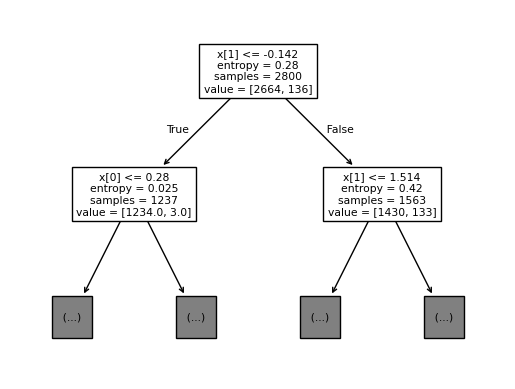

In [ ]:
from sklearn.tree  import plot_tree
plot_tree(DTC,max_depth=1)

DTC.tree_.feature is an array where each element tells you which feature was used to split at that node:

DTC.tree_.feature[0] → feature used at node 0 (the root node)

DTC.tree_.feature[1] → feature used at node 1 (left child of root)

DTC.tree_.feature[2] → feature used at node 2 (right child of root)

and so on for all nodes

Special case: if a node is a leaf, the value will be -2 (no splitting feature).

So, DTC.tree_.feature[0] = 5 means:

The root node splits the data using the 6th feature in your dataset (Python index starts at 0).

In [ ]:
DTC.tree_.feature[0]
DTC.tree_.feature[514]

np.int64(-2)

***Tree level attributes***

| Attribute              | Meaning                                                                      | Example / Intuition                                                  |
| ---------------------- | ---------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| `max_depth`            | The longest path from root to a leaf node                                    | If root → left → left → leaf = 3 edges, `max_depth = 3`              |
| `node_count`           | Total number of nodes in the tree (including root, internal, and leaf nodes) | Root + internal + leaf nodes. Helps you see tree size.               |
| `feature_importances_` | How much each feature contributed to splitting the tree                      | `[0.4, 0.2, 0.1, 0.3]` → feature 0 contributed most, feature 2 least |


In [ ]:
print('maximum depth of the tree :',DTC.tree_.max_depth)
print('\n')
print('total number of nodes in tree :',DTC.tree_.node_count)
print('\n')
print('total number of  classes',DTC.n_classes_)
print('\n')
print('total number of feature (columns)',DTC.n_features_in_)
print('\n')
print('Feature Nmaes:\n',DTC.feature_names_in_)
print('\n')
print('Feature importence :\n \n',DTC.feature_importances_)

maximum depth of the tree : 20


total number of nodes in tree : 515


total number of  classes 2


total number of feature (columns) 16


Feature Nmaes:
 ['Gender' 'Age' 'HasTension' 'AnyHeartDisease' 'NeverMarried'
 'Occupation_Govt_job' 'Occupation_Never_worked' 'Occupation_Private'
 'Occupation_Self-employed' 'Occupation_children' 'LivesIn' 'GlucoseLevel'
 'BMI' 'SmokingStatus_formerly smoked' 'SmokingStatus_never smoked'
 'SmokingStatus_smokes']


Feature importence :
 
 [0.02928094 0.37134298 0.04456757 0.03336887 0.02591095 0.02340357
 0.         0.05526088 0.02724466 0.00114403 0.04421945 0.1495548
 0.14447639 0.02126249 0.01819161 0.0107708 ]


***Node-level Attributes (information for each individual node)***

| Attribute        | Meaning                                                     | Example / Intuition                                                     |
| ---------------- | ----------------------------------------------------------- | ----------------------------------------------------------------------- |
| `children_left`  | Index of the left child node                                | Node 0 (root) splits → left child = node 1                              |
| `children_right` | Index of the right child node                               | Node 0 (root) splits → right child = node 2                             |
| `feature`        | Feature index used to split at this node                    | Node 0 splits on `feature_2`                                            |
| `threshold`      | Threshold value for that feature to decide left/right split | `feature_2 <= 0.5` → left if ≤ 0.5, right if > 0.5                      |
| `impurity`       | How “mixed” the samples are at this node                    | High impurity = mixed classes, low = mostly one class (Gini or Entropy) |
| `n_node_samples` | Number of samples that reach this node                      | Root node usually has all samples, leaves fewer                         |
| `value`          | Class distribution at this node                             | `[60,40]` → 60 samples of class 0, 40 of class 1                        |


1.Class_values

In [ ]:
print('class names order:',DTC.classes_)
print('class values at this perticular node( here 0 node {ROOT node}) \n',DTC.tree_.value[0])
print('\n')
print('class values at each node \n',DTC.tree_.value)


class names order: [0 1]
class values at this perticular node( here 0 node {ROOT node}) 
 [[0.95142857 0.04857143]]


class values at each node 
 [[[0.95142857 0.04857143]]

 [[0.99757478 0.00242522]]

 [[0.99593496 0.00406504]]

 ...

 [[0.         1.        ]]

 [[1.         0.        ]]

 [[0.         1.        ]]]


2. feature importance and threshold use  to split node[i]

In [ ]:
print('Featur',DTC.tree_.feature[0])      # for root node ( node=0)
print('threshold',DTC.tree_.threshold[0])

Featur 1
threshold -0.14174154008237072


3. impurity and number of sample at the node

In [ ]:
print('impurity',DTC.tree_.impurity[0])
print('number of samples', DTC.tree_.n_node_samples[0])

impurity 0.280297213158083
number of samples 2800


4. left and right child indices of the Root node

In [ ]:
print('Node value of left child of Root : ',DTC.tree_.children_left[0])
print('Node value of RIGHT child of Root : ',DTC.tree_.children_right[0])

Node value of left child of Root :  1
Node value of RIGHT child of Root :  34


**Q.10**
What is the value of entropy at the left child of root?

In [ ]:
DTC.tree_.children_left[0]

np.int64(1)

>>Above we found the node value for >>left child of root and then using >>that node to find the impurity

In [ ]:
DTC.tree_.impurity[1]

np.float64(0.024564134553940277)

**Q.10**   what are the leaf nodes

In [ ]:
leaf_nodes=np.where((DTC.tree_.children_left==-1)&(DTC.tree_.children_right==-1))

In [ ]:
df=pd.Series(leaf_nodes)

In [ ]:
leaf_nodes

(array([  5,   7,  10,  12,  15,  17,  19,  20,  21,  24,  25,  26,  27,
         29,  31,  32,  33,  44,  46,  47,  48,  49,  53,  57,  58,  60,
         62,  63,  64,  66,  70,  74,  76,  78,  80,  81,  82,  83,  84,
         86,  89,  91,  92,  93,  97, 100, 101, 102, 103, 106, 112, 114,
        115, 117, 119, 120, 121, 122, 123, 124, 126, 129, 132, 134, 135,
        136, 137, 139, 141, 143, 145, 147, 149, 151, 152, 156, 158, 159,
        161, 164, 165, 166, 171, 173, 176, 179, 180, 181, 182, 183, 186,
        187, 189, 191, 193, 194, 202, 203, 204, 207, 208, 209, 211, 216,
        217, 218, 219, 223, 224, 226, 228, 229, 230, 231, 234, 236, 238,
        241, 242, 243, 244, 245, 250, 253, 255, 256, 257, 258, 265, 266,
        267, 269, 271, 273, 274, 277, 278, 282, 283, 284, 285, 287, 288,
        289, 292, 297, 299, 300, 301, 302, 304, 306, 307, 308, 313, 319,
        320, 322, 323, 324, 325, 326, 327, 331, 337, 338, 340, 342, 343,
        344, 345, 348, 350, 351, 352, 354, 356, 357

In [ ]:
leaf_indices=np.array([  5,   7,  10,  12,  15,  17,  19,  20,  21,  24,  25,  26,  27,
         29,  31,  32,  33,  44,  46,  47,  48,  49,  53,  57,  58,  60,
         62,  63,  64,  66,  70,  74,  76,  78,  80,  81,  82,  83,  84,
         86,  89,  91,  92,  93,  97, 100, 101, 102, 103, 106, 112, 114,
        115, 117, 119, 120, 121, 122, 123, 124, 126, 129, 132, 134, 135,
        136, 137, 139, 141, 143, 145, 147, 149, 151, 152, 156, 158, 159,
        161, 164, 165, 166, 171, 173, 176, 179, 180, 181, 182, 183, 186,
        187, 189, 191, 193, 194, 202, 203, 204, 207, 208, 209, 211, 216,
        217, 218, 219, 223, 224, 226, 228, 229, 230, 231, 234, 236, 238,
        241, 242, 243, 244, 245, 250, 253, 255, 256, 257, 258, 265, 266,
        267, 269, 271, 273, 274, 277, 278, 282, 283, 284, 285, 287, 288,
        289, 292, 297, 299, 300, 301, 302, 304, 306, 307, 308, 313, 319,
        320, 322, 323, 324, 325, 326, 327, 331, 337, 338, 340, 342, 343,
        344, 345, 348, 350, 351, 352, 354, 356, 357, 359, 361, 364, 366,
        369, 370, 371, 372, 375, 379, 380, 381, 382, 385, 386, 389, 391,
        392, 393, 397, 398, 410, 412, 413, 414, 415, 417, 420, 421, 422,
        423, 424, 425, 426, 427, 429, 431, 432, 442, 443, 444, 445, 448,
        449, 450, 451, 454, 455, 456, 458, 461, 462, 464, 465, 466, 467,
        471, 474, 477, 478, 480, 481, 483, 484, 486, 488, 490, 493, 494,
        498, 499, 501, 502, 504, 506, 507, 510, 512, 513, 514])
len(leaf_indices)

258

# 8 . RandomForestClassifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(
                         criterion = 'gini',
                         random_state = 1729,
                         bootstrap = True)

PG={'n_estimators':[10, 20],
    'max_depth':[None, 5],
    'min_samples_split':[2, 5],
    'min_samples_leaf':[1, 2]}
grid=GridSearchCV(RF,PG,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1729),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]},
             scoring='accuracy')

In [ ]:
print('Best Model: ',grid.best_estimator_)
print('best score :',grid.best_score_)
print('best parameters : ',grid.best_params_)
print('number of parameters combinations tested  :',len(grid.cv_results_['params']))
print('total number of fits ', len(5*grid.cv_results_['params']))

Best Model:  RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=10,
                       random_state=1729)
best score : 0.9517857142857142
best parameters :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
number of parameters combinations tested  : 16
total number of fits  80


***retrain the best model from RandomnForestClassifer***

In [ ]:
best_RF=grid.best_estimator_

In [ ]:
best_RF.fit(x_train,y_train)
y_pre_test=best_RF.predict(x_test)
print('Report of all metrics for the test data : \n\n',classification_report(y_test,y_pred_test))
print('\n\n')
print('confusion_matrix for the test data:\n',confusion_matrix(y_test,y_pred_test))

Report of all metrics for the test data : 

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1142
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1200
   macro avg       0.48      0.50      0.49      1200
weighted avg       0.91      0.95      0.93      1200




confusion_matrix for the test data:
 [[1139    3]
 [  58    0]]


In [ ]:
print('classes :',best_RF.n_classes_)
print('no of trees fitted :',best_RF.n_estimators)
print('\n\n\n')
print('total features : ',best_RF.n_features_in_)
print('feature names :',best_RF.feature_names_in_)
print('overall feature importances : ',best_RF.feature_importances_)

classes : 2
no of trees fitted : 10




total features :  16
feature names : ['Gender' 'Age' 'HasTension' 'AnyHeartDisease' 'NeverMarried'
 'Occupation_Govt_job' 'Occupation_Never_worked' 'Occupation_Private'
 'Occupation_Self-employed' 'Occupation_children' 'LivesIn' 'GlucoseLevel'
 'BMI' 'SmokingStatus_formerly smoked' 'SmokingStatus_never smoked'
 'SmokingStatus_smokes']
overall feature importances :  [0.02657197 0.35941045 0.03242931 0.03436384 0.03732641 0.01017796
 0.         0.00354089 0.0110846  0.00118278 0.01136825 0.29176909
 0.1363846  0.02376951 0.01563665 0.00498369]


In [ ]:
# Access first tree in the forest

best_RF.estimators_[0].tree_.max_depth
best_RF.estimators_[5].tree_.feature

array([ 2,  1,  1, 10, 14, -2, -2, -2, 11, 11, -2, -2, 11, -2, -2,  4, 12,
       12, -2, -2, -2, 10, 11, -2, -2, 15, -2, -2,  1,  7, 12,  1, -2, -2,
       -2,  4, -2, 11, -2, -2,  1,  3, -2, -2, 11, 12, -2, -2, 13, -2, -2],
      dtype=int64)

In [ ]:
best_RF.estimators_[0].tree_.children_left[0]
print('Impurity of the left child of root for the first tree in the forest.',best_RF.estimators_[0].tree_.impurity[1])

Impurity of the left child of root for the first tree in the forest. 0.016358805399085963


In [ ]:
best_RF.estimators_[0].tree_.n_node_samples[0]

np.int64(1771)

#9. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AD=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                      n_estimators=50,
                      learning_rate=1,
                      algorithm='SAMME',
                      random_state=1729)

AD.fit(x_train,y_train)
y_pred_train=AD.predict(x_test)
AD.feature_importances_

array([0.02109551, 0.22914652, 0.03628497, 0.02860951, 0.00989642,
       0.01062341, 0.        , 0.00490687, 0.01084956, 0.        ,
       0.0179398 , 0.25794386, 0.3156249 , 0.0343976 , 0.01226931,
       0.01041176])

***GridSearch on AdaBoostClassifier***

In [ ]:
PG= {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.5, 1]
}

ADC=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                       algorithm='SAMME',
                       random_state=1729)


grid=GridSearchCV(ADC,PG,cv=3,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(),
                                          random_state=1729),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=10, random_state=1729)

In [ ]:
grid.feature_names_in_

array(['Gender', 'Age', 'HasTension', 'AnyHeartDisease', 'NeverMarried',
       'Occupation_Govt_job', 'Occupation_Never_worked',
       'Occupation_Private', 'Occupation_Self-employed',
       'Occupation_children', 'LivesIn', 'GlucoseLevel', 'BMI',
       'SmokingStatus_formerly smoked', 'SmokingStatus_never smoked',
       'SmokingStatus_smokes'], dtype=object)

In [ ]:
grid.best_score_

np.float64(0.9139310995897127)

In [ ]:
grid.classes_

array([0, 1])

In [ ]:
len(grid.cv_results_['params'])

9

In [ ]:
best_AD=grid.best_estimator_

In [ ]:
best_AD.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=10, random_state=1729)

In [ ]:
best_AD.estimators_[0].tree_.n_node_samples
best_AD.estimators_[0].tree_.n_node_samples[0]

np.int64(2800)

***RandomizedSearch Search on AdaBoostClassifier***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
Rgrid=RandomizedSearchCV(ADC,PG,n_iter=6,cv=3,scoring='accuracy',random_state=1729)
Rgrid.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                estimator=DecisionTreeClassifier(),
                                                random_state=1729),
                   n_iter=6,
                   param_distributions={'learning_rate': [0.1, 0.5, 1],
                                        'n_estimators': [10, 50, 100]},
                   random_state=1729, scoring='accuracy')

In [ ]:
Rgrid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=10, random_state=1729)

In [ ]:
Rgrid.best_score_

np.float64(0.9139310995897127)

#10. GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier(loss='log_loss',
                               random_state=1729,
                               n_estimators=50)
PG={'n_estimators': [5, 10, 15],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.5]}
grid=GridSearchCV(GBC,PG,cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(n_estimators=50,
                                                  random_state=1729),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 3, 4], 'n_estimators': [5, 10, 15]})

***GridSearch Attributes***

In [ ]:
print('CV_accuracy : ', grid.best_score_)
print('\n')
print('best model[estimator] : \n',grid.best_estimator_)
print('\n')
print('Total number of combinations Tested ',len(grid.cv_results_['params']))
print('\n')
print('Total number of fits [ multiply total combinations with cv value given in question]',3*len(grid.cv_results_['params']))

CV_accuracy :  0.9514288140533518


best model[estimator] : 
 GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=5,
                           random_state=1729)


Total number of combinations Tested  27


Total number of fits [ multiply total combinations with cv value given in question] 81


***Retrain the best model obtained from Grid Search***

In [ ]:
best_GBC=grid.best_estimator_
best_GBC.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=5,
                           random_state=1729)

**whole forst level Attributes**

In [ ]:
print('slect first  tree in model :\n',best_GBC.estimators_[0])
print('\n\n')
print('All  trees in Model: \n',best_GBC.estimators_)
print('\n\n')
print('feature names in best model :\n',best_GBC.feature_names_in_)
print('\n\n')
print('OVERALL feature in best model :\n',best_GBC.feature_importances_)
print('\n\n')
print('maximum depth of base estimators (trees) in the gradient boosting ensemble.',best_GBC.max_depth)
print('\n\n')
print('total number of tress trained :',best_GBC.n_estimators)


slect first  tree in model :
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                       random_state=RandomState(MT19937) at 0x781A6EEE6B40)]



All  trees in Model: 
 [[DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                        random_state=RandomState(MT19937) at 0x781A6EEE6B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                        random_state=RandomState(MT19937) at 0x781A6EEE6B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                        random_state=RandomState(MT19937) at 0x781A6EEE6B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                        random_state=RandomState(MT19937) at 0x781A6EEE6B40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                        random_state=RandomState(MT19937) at 0x781A6EEE6B40)]]



feature names in best model :
 ['Gender' 'Age' 'HasTension' 'AnyHeartDisease' 'NeverMarried'
 'O

***Tree level attributes***

In [ ]:
# first select a Tree [ex:tree-3]
T2=best_GBC.estimators_[2,0]
print('3rd Tree is :\n',T2)

3rd Tree is :
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      random_state=RandomState(MT19937) at 0x781A6EEE6B40)


In [ ]:
print('Maximum depth of the tree. : ',T2.tree_.max_depth)

print('Total number of nodes in the tree :',T2.tree_.node_count)
print('\n')

print('Importance score of each feature in this tree :\n', T2.tree_.compute_feature_importances())
print('\n')

print('Number of input features the tree was trained on : ', T2.tree_.n_features)
print('\n')
print('Names of input features the tree was trained on',T2.tree_.feature)


Maximum depth of the tree. :  2
Total number of nodes in the tree : 7


Importance score of each feature in this tree :
 [0.         0.87983465 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.12016535
 0.         0.         0.         0.        ]


Number of input features the tree was trained on :  16


Names of input features the tree was trained on [ 1  1 -2 -2 11 -2 -2]


**Node-Level Attributes** *(access via .tree_)*

In [ ]:
# first select a Tree [ex:tree_2]
T1=best_GBC.estimators_[1,0]
print('3rd Tree is :\n',T1)

3rd Tree is :
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      random_state=RandomState(MT19937) at 0x781A6EEE6B40)


In [ ]:
print('Index of the left child for root node',T1.tree_.children_left[0])
print('Index of the right child for 5th node',T1.tree_.children_right[5])

Index of the left child for root node 1
Index of the right child for 5th node -1


In [ ]:
print('Feature used for splitting at root node',T1.tree_.feature[0])

Feature used for splitting at root node 1


In [ ]:
print('Threshold value used for splitting at 8 node:',T1.tree_.threshold[6])

Threshold value used for splitting at 8 node: -2.0


In [ ]:
print('Impurity at each node :\n',T1.tree_.impurity)
print('\n')
print('Impurity at root node[root node=0] : \n ',T1.tree_.impurity[0])
print('\n')
print('Impurity at 5th node : \n ',T1.tree_.impurity[5])

Impurity at each node :
 [0.04612688 0.02189237 0.00427647 0.04730515 0.14455134 0.11828301
 0.18907226]


Impurity at root node[root node=0] : 
  0.04612688185480104


Impurity at 5th node : 
  0.11828301355771054


In [ ]:
print('Number of samples that reach at  each  node',T2.tree_.n_node_samples)
print('\n')
print('Number of samples that reach at 6  node',T2.tree_.n_node_samples[6])

Number of samples that reach at  each  node [2800 2321 1397  924  479  321  158]


Number of samples that reach at 6  node 158


In [ ]:
print('Class counts (for classification) at the node they rpresents class 0 and class 1 values for each node : \n',T2.tree_.value)


Class counts (for classification) at the node they rpresents class 0 and class 1 values for each node : 
 [[[-8.10543077e-06]]

 [[-2.56488405e-02]]

 [[-9.55521414e-01]]

 [[ 2.56953007e-02]]

 [[ 1.24234371e-01]]

 [[ 1.81382875e+00]]

 [[ 4.01342601e+00]]]


***Leaf-Level Attributes***

In [ ]:
leaf_nodes=np.where((T2.tree_.children_left==-1) &(T2.tree_.children_right==-1))
print('leaf_nodes',leaf_nodes)

leaf_nodes (array([2, 3, 5, 6]),)


[Text(0.5, 0.8333333333333334, 'x[1] <= 1.076\nfriedman_mse = 0.046\nsamples = 2800\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[1] <= 0.058\nfriedman_mse = 0.022\nsamples = 2321\nvalue = -0.026'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 0.004\nsamples = 1397\nvalue = -0.956'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 0.047\nsamples = 924\nvalue = 0.026'),
 Text(0.75, 0.5, 'x[11] <= 0.335\nfriedman_mse = 0.144\nsamples = 479\nvalue = 0.124'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 0.118\nsamples = 321\nvalue = 1.814'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 0.189\nsamples = 158\nvalue = 4.013')]

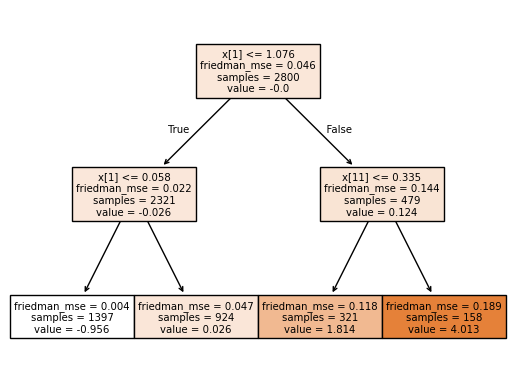

In [ ]:
plot_tree(T2,filled=True)

# PLEASE READ THIS ✌

In [ ]:
print('  Search my name on  Google \nIF YOU GOT ANY HELP FROM ME :        shashikumar kohir  \n     ')


  Search my name on  Google 
IF YOU GOT ANY HELP FROM ME :        shashikumar kohir  
     


In [ ]:
print('IF any Mistakes Please correct dont blame on me\nIt took me continuously 28 hours without break without sleep to make this thing\nIts not like I knew everything I learned every single thing from scratch and tried to build this')

IF any Mistakes Please correct dont blame on me
It took me continuously 28 hours without break without sleep to make this thing
Its not like I knew everything I learned every single thing from scratch and tried to build this


In [ ]:
print('All the best fro Your OPPE-2')

All the best fro Your OPPE-2
